# Implementation of Circuits From arxiv 2011.09692

In [25]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *
from qiskit.circuit.library import *

import matplotlib.pyplot as plt
import numpy as np
import typing

%matplotlib inline

## Quantum Teleportation Circuit (Fig. 1)

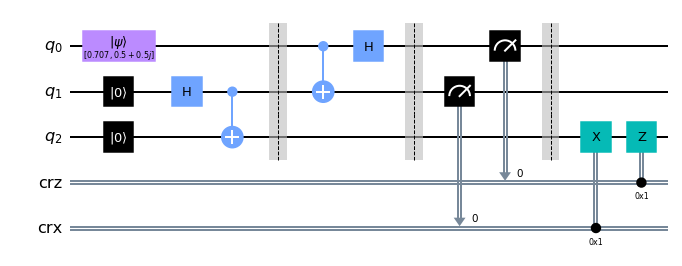

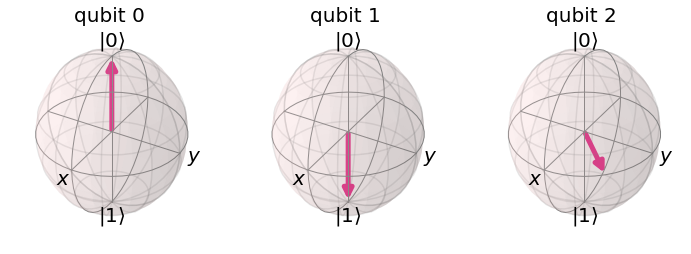

In [26]:
Array = np.ndarray

def teleporter(phi: Array):
    assert phi.shape[0] == 2, "initialized state must have 2 entries (single qubit)"
    qr = QuantumRegister(3, 'q')
    crz = ClassicalRegister(1, 'crz')
    crx = ClassicalRegister(1, 'crx')
    circ = QuantumCircuit(qr, crz, crx)
    
    circ.reset(qr[1])
    circ.reset(qr[2])
    
    circ.h(qr[1])
    circ.cx(qr[1], qr[2])
    
    circ.initialize(phi, qr[0])
    
    circ.barrier()
    
    circ.cx(qr[0], qr[1])
    circ.h(qr[0])
    
    circ.barrier()
    
    circ.measure(qr[1], crx)
    circ.measure(qr[0], crz)   
    
    circ.barrier()
    
    circ.x(qr[2]).c_if(crx, 1)
    circ.z(qr[2]).c_if(crz, 1)
    
    return circ

sv_simulator = Aer.get_backend('statevector_simulator')
# Let's teleport the state 1/sqrt(2) [1, exp(i pi / 4)]
phi = np.array([1/np.sqrt(2), 1/np.sqrt(2) * np.exp(1j * np.pi / 4)])
circ = teleporter(phi)

display(circ.draw('mpl'))

result = execute(circ, sv_simulator).result()
display(plot_bloch_multivector(result.get_statevector(circ, decimals = 3)))